In [1]:
pip install psycopg2

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import psycopg2
import pandas as pd
import psycopg2.extras
import psycopg2

In [4]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "123456",
                                           host = "127.0.0.1",
                                           port = "5433")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [5]:
con = PostgresConnection().getConnection()

successfully connected to database


In [6]:
cur = con.cursor()
select_stmt = '''select  t.year,
               t.month,
               i.item_name,
               sum(f.total_price) 
               from ecomdb.fact_table f 
               join ecomdb.time_dim t on t.time_key = f.time_key
               join ecomdb.item_dim i on i.item_key = f.item_key
               group by (i.item_name,t.year,t.month)
               order by (i.item_name,t.year) '''
cur.execute(select_stmt)
records = cur.fetchall()

In [7]:
df = pd.DataFrame(list(records), columns=['year', 'month', 'item_name','total_sales'])
df.head()

,year,month,item_name,total_sales
0,2014,1,100% Juice Box Variety 6.75 oz,1980.0
1,2014,2,100% Juice Box Variety 6.75 oz,3360.0
2,2014,3,100% Juice Box Variety 6.75 oz,4470.0
3,2014,4,100% Juice Box Variety 6.75 oz,3060.0
4,2014,5,100% Juice Box Variety 6.75 oz,4500.0


In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
X = df.iloc[:,:-1]
X.item_name.duplicated().sum()

21756

In [10]:
X = pd.get_dummies(X,columns = ['item_name'])

In [11]:
X.head()

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
0,2014,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y = df.iloc[:,-1]
y.head()

0    1980.0
1    3360.0
2    4470.0
3    3060.0
4    4500.0
Name: total_sales, dtype: object

In [13]:
pip install sklearn

In [15]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42) 

In [16]:
X_train

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
460,2016,12,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10769,2018,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9149,2018,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4387,2018,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8453,2017,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2019,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21575,2019,11,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5390,2016,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,2014,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

### Accuracy score

In [19]:
regressor.score(X_test,y_test)

0.8487407128382054

In [20]:
pred = regressor.predict(X_test)
pred

array([4709.71489268, 4037.71943669, 4017.56004237, ..., 3392.33307931,
       1626.34524392, 4859.35116289])

In [21]:
y_test[:5]

369       3762.0
9325      4448.0
13966     4860.0
18590    10710.0
16719     3384.0
Name: total_sales, dtype: object

In [22]:
# X_train['year'].length()

In [23]:
X_test

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
369,2016,6,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9325,2019,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13966,2016,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18590,2019,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16719,2018,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,2018,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12566,2019,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14510,2019,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4844,2021,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# plt.plot(X_test['year']==2014,y_test)
# plt.show()

In [25]:
X_train.columns

Index(['year', 'month', 'item_name_100% Juice Box Variety 6.75 oz ',
       'item_name_A&W Root Beer - 12 oz cans',
       'item_name_A&W Root Beer Diet - 12 oz cans',
       'item_name_Advil 2 pill packets',
       'item_name_All Purpose Cleaner 409 Spray',
       'item_name_Altoids Small Packs Variety',
       'item_name_Apple Sauce Variety GoGO Squeeze 3.2oz',
       'item_name_AquaFina Purified Drinking Water 16oz',
       ...
       'item_name_Waterloo Sparkling Lemon 12oz',
       'item_name_Waterloo Sparkling Lime 12oz',
       'item_name_Waterloo Sparkling Mango 12oz',
       'item_name_Waterloo Sparkling Original 12oz',
       'item_name_Waterloo Sparkling Watermelon 12oz',
       'item_name_Welch's 100% Juice Variety10 oz',
       'item_name_Wint O Green LifeSavers Sugar Free',
       'item_name_Wonderful Pistachios (in shell)',
       'item_name_Yoplait Original Yogurt Variety Pack ',
       'item_name_Zoo Animal Cookies/Crackers'],
      dtype='object', length=261)

In [26]:
# x_df = X_test[:10]
# y_df = y_test[:10]
# pred_df = pred[:10]
# plt.subplot(1,2,1)
# # x = linspace(0,10);
# # y1 = sin(x);
# plt.plot(x_df['year']==2018,y_df)
# plt.title('Actual values')

# plt.subplot(1,2,2)
# # x = lin?space(0,10);
# # y1 = sin(x);

# plt.plot(x_df['year']==2018,pred_df)
# plt.title('predicted value')


In [27]:
new_df = 0

In [28]:
X.iloc[:12,0]

0     2014
1     2014
2     2014
3     2014
4     2014
5     2014
6     2014
7     2014
8     2014
9     2014
10    2014
11    2014
Name: year, dtype: object

In [29]:
# pr = regressor.predict([[2022,1,1]])

In [30]:
new_df = X.iloc[:12,:]
X_train.columns

Index(['year', 'month', 'item_name_100% Juice Box Variety 6.75 oz ',
       'item_name_A&W Root Beer - 12 oz cans',
       'item_name_A&W Root Beer Diet - 12 oz cans',
       'item_name_Advil 2 pill packets',
       'item_name_All Purpose Cleaner 409 Spray',
       'item_name_Altoids Small Packs Variety',
       'item_name_Apple Sauce Variety GoGO Squeeze 3.2oz',
       'item_name_AquaFina Purified Drinking Water 16oz',
       ...
       'item_name_Waterloo Sparkling Lemon 12oz',
       'item_name_Waterloo Sparkling Lime 12oz',
       'item_name_Waterloo Sparkling Mango 12oz',
       'item_name_Waterloo Sparkling Original 12oz',
       'item_name_Waterloo Sparkling Watermelon 12oz',
       'item_name_Welch's 100% Juice Variety10 oz',
       'item_name_Wint O Green LifeSavers Sugar Free',
       'item_name_Wonderful Pistachios (in shell)',
       'item_name_Yoplait Original Yogurt Variety Pack ',
       'item_name_Zoo Animal Cookies/Crackers'],
      dtype='object', length=261)

In [31]:

# new_df

In [32]:
X_test.columns.get_loc("item_name_Waterloo Sparkling Lemon 12oz")

251

In [33]:
for j in range(12):
    for i in range(261):
        new_df.iloc[j,i]=0
for j in range(12):
    new_df.iloc[j,0]=2022
    new_df.iloc[j,1]=j+1
    new_df.iloc[j,251]=1
    
            

C:\Users\Administrator\.conda\envs\HDA\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [34]:
new_df

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
0,2022,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2022,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2022,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2022,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2022,5,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2022,6,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,2022,7,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,2022,8,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,2022,9,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,2022,10,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [35]:
# for j in range(12):
    

In [54]:
# new_df

In [37]:
# new_df = new_df.values.reshape(1,-1)

In [38]:
pred_2022=regressor.predict(new_df)

In [39]:
pred_2022

array([1945.04629927, 1980.06082572, 2015.07535217, 2050.08987861,
       2085.10440506, 2120.1189315 , 2155.13345795, 2190.1479844 ,
       2225.16251084, 2260.17703729, 2295.19156373, 2330.20609018])

Text(0.5, 1.0, "prediction of 2022 for 'Waterloo Sparkling Lemon 12oz'")

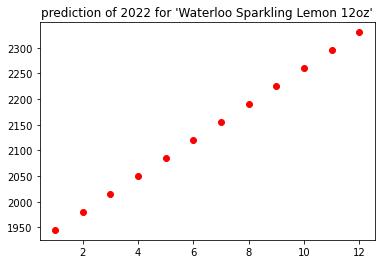

In [42]:
#prediction of 2022 for "Waterloo Sparkling Lemon 12oz"
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],pred_2022,'ro')
plt.title("prediction of 2022 for 'Waterloo Sparkling Lemon 12oz'")

In [44]:
df.head()

,year,month,item_name,total_sales
0,2014,1,100% Juice Box Variety 6.75 oz,1980.0
1,2014,2,100% Juice Box Variety 6.75 oz,3360.0
2,2014,3,100% Juice Box Variety 6.75 oz,4470.0
3,2014,4,100% Juice Box Variety 6.75 oz,3060.0
4,2014,5,100% Juice Box Variety 6.75 oz,4500.0


In [45]:
con = PostgresConnection().getConnection()

successfully connected to database


### Visualization

In [46]:
cur = con.cursor()
select_stmt = '''select  t.year,
               t.month,
               i.item_name,
               sum(f.total_price) 
               from ecomdb.fact_table f 
               join ecomdb.time_dim t on t.time_key = f.time_key
               join ecomdb.item_dim i on i.item_key = f.item_key
               where i.item_name = 'A&W Root Beer - 12 oz cans' and t.year = 2020
               group by (i.item_name,t.year,t.month)
               order by (i.item_name,t.year) '''
cur.execute(select_stmt)
records = cur.fetchall()
records

[(Decimal('2020'),
  Decimal('1'),
  'A&W Root Beer - 12 oz cans',
  Decimal('2461.0')),
 (Decimal('2020'),
  Decimal('2'),
  'A&W Root Beer - 12 oz cans',
  Decimal('2875.0')),
 (Decimal('2020'),
  Decimal('3'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3105.0')),
 (Decimal('2020'),
  Decimal('4'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3657.0')),
 (Decimal('2020'),
  Decimal('5'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3496.0')),
 (Decimal('2020'),
  Decimal('6'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3346.5')),
 (Decimal('2020'),
  Decimal('7'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3059.0')),
 (Decimal('2020'),
  Decimal('8'),
  'A&W Root Beer - 12 oz cans',
  Decimal('2990.0')),
 (Decimal('2020'),
  Decimal('9'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3208.5')),
 (Decimal('2020'),
  Decimal('10'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3174.0')),
 (Decimal('2020'),
  Decimal('11'),
  'A&W Root Beer - 12 oz cans',
  Decimal('2886.5')),
 (Decimal('2020'),


In [47]:
#Predicting this dataframe
df_viz = pd.DataFrame(list(records), columns=['year', 'month', 'item_name','total_sales'])
df_viz

,year,month,item_name,total_sales
0,2020,1,A&W Root Beer - 12 oz cans,2461.0
1,2020,2,A&W Root Beer - 12 oz cans,2875.0
2,2020,3,A&W Root Beer - 12 oz cans,3105.0
3,2020,4,A&W Root Beer - 12 oz cans,3657.0
4,2020,5,A&W Root Beer - 12 oz cans,3496.0
5,2020,6,A&W Root Beer - 12 oz cans,3346.5
6,2020,7,A&W Root Beer - 12 oz cans,3059.0
7,2020,8,A&W Root Beer - 12 oz cans,2990.0
8,2020,9,A&W Root Beer - 12 oz cans,3208.5
9,2020,10,A&W Root Beer - 12 oz cans,3174.0


In [48]:
#for index 
X_test.columns.get_loc("item_name_A&W Root Beer - 12 oz cans")

3

In [49]:
new_df = X.iloc[:12,:]
new_df

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
0,2022,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2022,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2022,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2022,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2022,5,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2022,6,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,2022,7,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,2022,8,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,2022,9,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,2022,10,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [50]:
for j in range(12):
    for i in range(261):
        new_df.iloc[j,i]=0
for j in range(12):
    new_df.iloc[j,0]=2020        
    new_df.iloc[j,1]=j+1
    new_df.iloc[j,3]=1           #item_index index for prediction

C:\Users\Administrator\.conda\envs\HDA\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [55]:
new_df   # dataframe for prediction 

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
0,2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020,6,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2020,8,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2020,9,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2020,10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
pred_item = regressor.predict(new_df) 
pred_item

array([3007.14651714, 3042.16104359, 3077.17557003, 3112.19009648,
       3147.20462292, 3182.21914937, 3217.23367582, 3252.24820226,
       3287.26272871, 3322.27725515, 3357.2917816 , 3392.30630805])

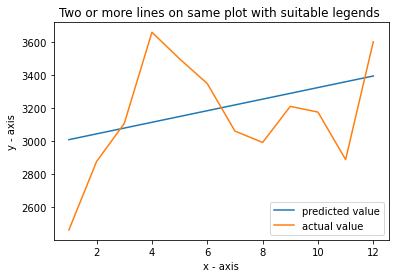

In [53]:
import matplotlib.pyplot as plt
# line 1 points
x1 = [1,2,3,4,5,6,7,8,9,10,11,12]
y1 = pred_item
# plotting the line 1 points 
plt.plot(x1, y1, label = "predicted value")
# line 2 points
x2 = new_df.iloc[:,1]
y2 = df_viz.iloc[:,3]
# plotting the line 2 points 
plt.plot(x2, y2, label = "actual value")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()

# Random forest

In [50]:
# df.to_csv('total_sales.csv',index = False)

In [92]:
df.head()

,year,month,item_name,total_sales
0,2014,1,100% Juice Box Variety 6.75 oz,1980.0
1,2014,2,100% Juice Box Variety 6.75 oz,3360.0
2,2014,3,100% Juice Box Variety 6.75 oz,4470.0
3,2014,4,100% Juice Box Variety 6.75 oz,3060.0
4,2014,5,100% Juice Box Variety 6.75 oz,4500.0


In [99]:
X= df.iloc[:,:-1]
X.head()

,year,month,item_name
0,2014,1,100% Juice Box Variety 6.75 oz
1,2014,2,100% Juice Box Variety 6.75 oz
2,2014,3,100% Juice Box Variety 6.75 oz
3,2014,4,100% Juice Box Variety 6.75 oz
4,2014,5,100% Juice Box Variety 6.75 oz


In [100]:
y = df.iloc[:,-1]
y.head()

0    1980.0
1    3360.0
2    4470.0
3    3060.0
4    4500.0
Name: total_sales, dtype: object

In [101]:
X = pd.get_dummies(X,columns = ['item_name'])
X

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
0,2014,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22010,2020,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22011,2020,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22012,2020,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22013,2020,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22015 entries, 0 to 22014
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         22015 non-null  object
 1   month        22015 non-null  object
 2   item_name    22015 non-null  object
 3   total_sales  22015 non-null  object
dtypes: object(4)
memory usage: 688.1+ KB


In [103]:
y = y.astype('int64')

In [105]:
len(df)

22015

In [93]:
# len(Xs_train)

In [106]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8,test_size = 0.2 , random_state = 42)

In [63]:
# Xs_train = X_svm.iloc[:16000]
# Xs_test = X_svm.iloc[16000:]
# ys_train = y_svm.iloc[:16000]
# ys_test = y_svm.iloc[16000:]

In [107]:
len(y_train)

17612

In [108]:
X_train.head()

,year,month,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,item_name_AquaFina Purified Drinking Water 16oz,...,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack,item_name_Zoo Animal Cookies/Crackers
460,2016,12,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10769,2018,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9149,2018,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4387,2018,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8453,2017,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(Xs_train['item_name'])
# list(le.classes_)
# Xs_train['item_name']=le.transform(Xs_train['item_name'])
# Xs_train['item_name']

In [109]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000,random_state=42)


In [110]:
regressor.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
regressor.score(X_test,y_test)

In [ ]:
pred = regressor.predict(X_test)
pred[:5]

In [ ]:
y_test[:5]

## Visualization

In [111]:
cur = con.cursor()
select_stmt = '''select  t.year,
               t.month,
               i.item_name,
               sum(f.total_price) 
               from ecomdb.fact_table f 
               join ecomdb.time_dim t on t.time_key = f.time_key
               join ecomdb.item_dim i on i.item_key = f.item_key
               where i.item_name = 'A&W Root Beer - 12 oz cans' and t.year = 2020
               group by (i.item_name,t.year,t.month)
               order by (i.item_name,t.year) '''
cur.execute(select_stmt)
records = cur.fetchall()
records

[(Decimal('2020'),
  Decimal('1'),
  'A&W Root Beer - 12 oz cans',
  Decimal('2461.0')),
 (Decimal('2020'),
  Decimal('2'),
  'A&W Root Beer - 12 oz cans',
  Decimal('2875.0')),
 (Decimal('2020'),
  Decimal('3'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3105.0')),
 (Decimal('2020'),
  Decimal('4'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3657.0')),
 (Decimal('2020'),
  Decimal('5'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3496.0')),
 (Decimal('2020'),
  Decimal('6'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3346.5')),
 (Decimal('2020'),
  Decimal('7'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3059.0')),
 (Decimal('2020'),
  Decimal('8'),
  'A&W Root Beer - 12 oz cans',
  Decimal('2990.0')),
 (Decimal('2020'),
  Decimal('9'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3208.5')),
 (Decimal('2020'),
  Decimal('10'),
  'A&W Root Beer - 12 oz cans',
  Decimal('3174.0')),
 (Decimal('2020'),
  Decimal('11'),
  'A&W Root Beer - 12 oz cans',
  Decimal('2886.5')),
 (Decimal('2020'),


In [113]:
df_viz = pd.DataFrame(list(records), columns=['year', 'month', 'item_name','total_sales'])
df_viz.to_csv('df_test.csv',index = False)

In [82]:
X_train.columns

Index(['year', 'month', 'total_sales',
       'item_name_100% Juice Box Variety 6.75 oz ',
       'item_name_A&W Root Beer - 12 oz cans',
       'item_name_A&W Root Beer Diet - 12 oz cans',
       'item_name_Advil 2 pill packets',
       'item_name_All Purpose Cleaner 409 Spray',
       'item_name_Altoids Small Packs Variety',
       'item_name_Apple Sauce Variety GoGO Squeeze 3.2oz',
       ...
       'item_name_Waterloo Sparkling Grapefruit 12oz',
       'item_name_Waterloo Sparkling Lemon 12oz',
       'item_name_Waterloo Sparkling Lime 12oz',
       'item_name_Waterloo Sparkling Mango 12oz',
       'item_name_Waterloo Sparkling Original 12oz',
       'item_name_Waterloo Sparkling Watermelon 12oz',
       'item_name_Welch's 100% Juice Variety10 oz',
       'item_name_Wint O Green LifeSavers Sugar Free',
       'item_name_Wonderful Pistachios (in shell)',
       'item_name_Yoplait Original Yogurt Variety Pack '],
      dtype='object', length=261)

In [83]:
#for index 
X_train.columns.get_loc("item_name_A&W Root Beer - 12 oz cans")

4

In [78]:
X_train

,year,month,total_sales,item_name_100% Juice Box Variety 6.75 oz,item_name_A&W Root Beer - 12 oz cans,item_name_A&W Root Beer Diet - 12 oz cans,item_name_Advil 2 pill packets,item_name_All Purpose Cleaner 409 Spray,item_name_Altoids Small Packs Variety,item_name_Apple Sauce Variety GoGO Squeeze 3.2oz,...,item_name_Waterloo Sparkling Grapefruit 12oz,item_name_Waterloo Sparkling Lemon 12oz,item_name_Waterloo Sparkling Lime 12oz,item_name_Waterloo Sparkling Mango 12oz,item_name_Waterloo Sparkling Original 12oz,item_name_Waterloo Sparkling Watermelon 12oz,item_name_Welch's 100% Juice Variety10 oz,item_name_Wint O Green LifeSavers Sugar Free,item_name_Wonderful Pistachios (in shell),item_name_Yoplait Original Yogurt Variety Pack
460,2016,12,3000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10769,2018,12,3750.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9149,2018,7,3836.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4387,2018,5,8836.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8453,2017,3,2532.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2019,5,4256.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21575,2019,11,2184.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5390,2016,12,6100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,2014,11,4208.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
y_train

460      3000
10769    3750
9149     3836
4387     8836
8453     2532
         ... 
11964    4256
21575    2184
5390     6100
860      4208
15795    7617
Name: total_sales, Length: 17612, dtype: int64